<a href="https://colab.research.google.com/github/shahbazkhan112/HOTEL-BOOKING-ANALYSIS-CAPSTONE-PROJECT/blob/main/(SHAHBAZ_KHAN)_Hotel_Booking_Analysis_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#importing python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data Frame is loaded from source file
hotel_df = pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

We have seen from above there are 32 columns and 119390 rows are present.But there are columns like 'children','country','agent','company' contains null values.

In [ ]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


### <b> Cleaning data </b> 

Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps: \
1) Remove duplicate rows  \
2) Handling missing values.  \
3) Convert columns to appropriate datatypes.  \
4) Adding important columns

### <b> Step 1: Removing duplicate rows if any </b>

In [ ]:
# shape of original Data Frame
hotel_df.shape

(119390, 32)

In [ ]:
# shape of Data Frame containing duplicate rows
hotel_df[hotel_df.duplicated()].shape

(31994, 32)

In [ ]:
# removing duplicate rows
hotel_df.drop_duplicates(inplace=True)
#after removing duplicate rows shape of original Data Frame
hotel_df.shape

(87396, 32)



### <b> Step2: Handling missing values. </b>

In [ ]:
hotel_df.isnull().sum().sort_values(ascending=False)[:10]

company                   82137
agent                     12193
country                     452
children                      4
reserved_room_type            0
assigned_room_type            0
booking_changes               0
deposit_type                  0
hotel                         0
previous_cancellations        0
dtype: int64

We have identified four columns having null values  'children','country','agent','company'.



*   'agent' and 'comapny' contains Nan values for the bookings for which the booking was done directly by customer. Hence we can replace them with 0 as datatype is float.
*   'country' contains Nan values and can be replaced with 'Others' as the datatype is string.
*   'children' contains only 5 Nan values, so it might happend the hotel booking entries are not recorded properly due to human error. Hence we will consider the mean value of 'children' to replace the Nan.






In [ ]:
hotel_df.fillna({'agent':0,'company':0,'country':'Otheres','children':hotel_df['children'].mean()},inplace=True)

In [ ]:
#Let's check if null values are removed or not
hotel_df.isnull().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

### <b> Step 3: Converting columns to appropriate datatypes. </b>

In [ ]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
hotel_df[['children', 'company', 'agent']] = hotel_df[['children', 'company', 'agent']].astype('int64')

In [ ]:
# changing datatype of column 'reservation_status_date' to data_type.
hotel_df['reservation_status_date'] = pd.to_datetime(hotel_df['reservation_status_date'], format = '%Y-%m-%d')

### <b> Step 4: Adding important columns. </b>

In [ ]:
# Adding total staying days in hotels
hotel_df['total_stay'] = hotel_df['stays_in_weekend_nights']+hotel_df['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
hotel_df['total_people'] = hotel_df['adults']+hotel_df['children']+hotel_df['babies']

## EDA ##

Lets first find the correlation between the numerical data.\
 \


Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type. So we wont need to check them for correlation.\
 \

Also, we have added total_stay and total_people columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.

In [ ]:
numerical_df = hotel_df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]


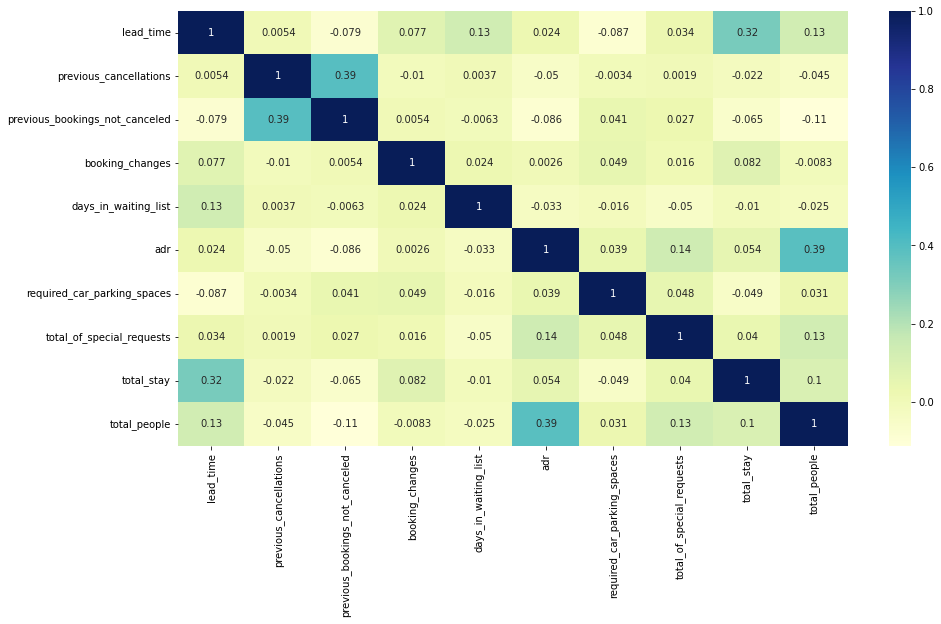

In [ ]:
#correlation matrix
corrmat = numerical_df.corr()
plt.subplots(figsize=(15, 8))
sns.heatmap(corrmat,annot=True,cmap='YlGnBu')

1-'total_people' and 'adr' has slight correlation. It means more number of people means, more adr which in turns more revenue.

2-'lead_time' and 'total_stay' has slight correlation, which indicates usually people with longer stay plans earlier than the actual arrival.


Lets see does length of stay affects the adr.

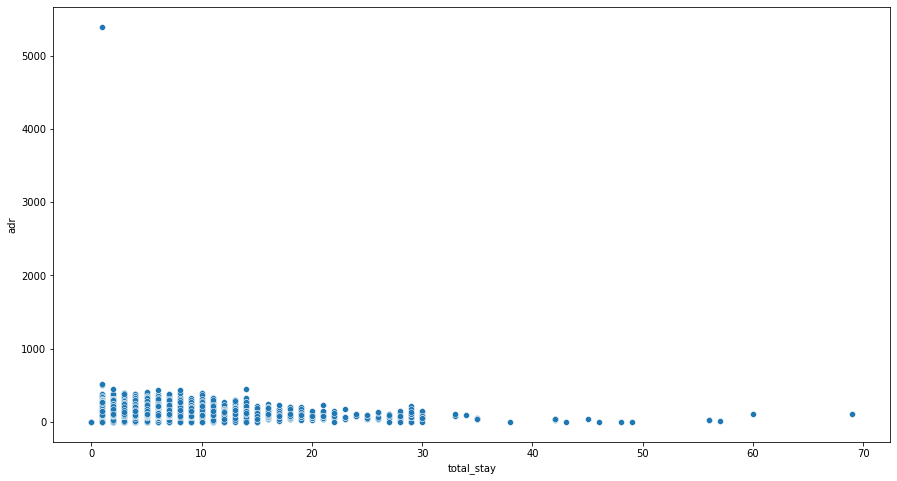

In [ ]:
plt.subplots(figsize=(15, 8))
sns.scatterplot(x='total_stay',y='adr',data=hotel_df)

We notice that there is an outlier in adr, so we will remove that for better scatter plot

In [ ]:
hotel_df.drop(hotel_df[hotel_df['adr']>5000].index,inplace=True)

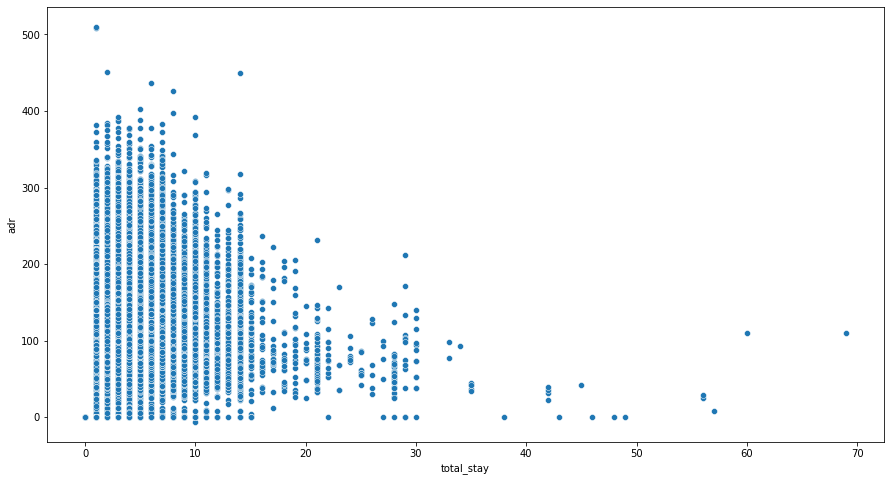

In [ ]:
plt.subplots(figsize=(15,8))
sns.scatterplot(x='total_stay',y='adr',data=hotel_df)

From the scatter plot we can see that as length of 'total_stay' increases the 'adr' decreases. This means for longer stay, the better deal for customer can be finalised.

## Univariate Analysis

Q1) Which agent makes most no. of bookings?

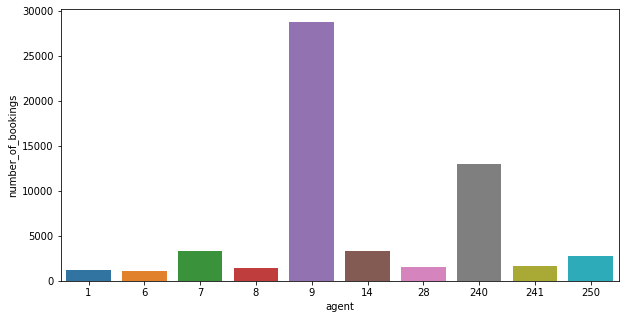

In [ ]:
# Here we will use value_counts to plot the chart
plt.figure(figsize = (10,5))
#Dataframe which contains the result of highest 10 booking done by agent. Excluded the agent where value is zero
agent_df = pd.DataFrame(hotel_df[hotel_df['agent']>0]['agent'].value_counts()).reset_index().rename(columns={'index':'agent','agent':'number_of_bookings'}).sort_values(ascending=False,by='number_of_bookings')[:10]
sns.barplot(x = 'agent', y = 'number_of_bookings', data = agent_df)

So it is clear Agent no.9 has done the highest booking.

Q2) Which room type is in most demand and which room type generates highest adr?

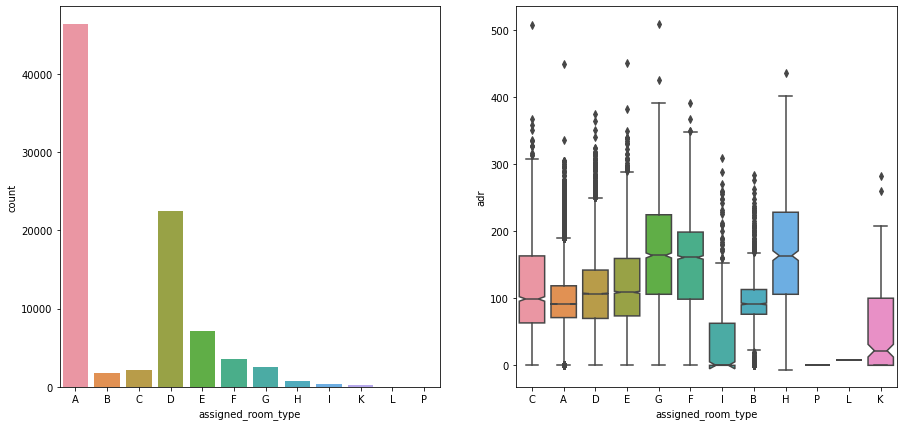

In [ ]:
#Here we will use and groupby and count toplot the charts
fig,axes = plt.subplots(1,2,figsize=(15,7))
room_df = hotel_df.groupby('assigned_room_type')['assigned_room_type'].count().reset_index(name='count');
sns.barplot(ax=axes[0],x='assigned_room_type',y='count',data=room_df)
sns.boxplot(ax=axes[1],x='assigned_room_type',y='adr',data=hotel_df,notch=True)

Most demanded room type is A, but better adr rooms are of type H, G and F also. Hotels should increase the no. of room types A and H to maximise revenue.

Q3) Which meal type is most preffered meal of customers?

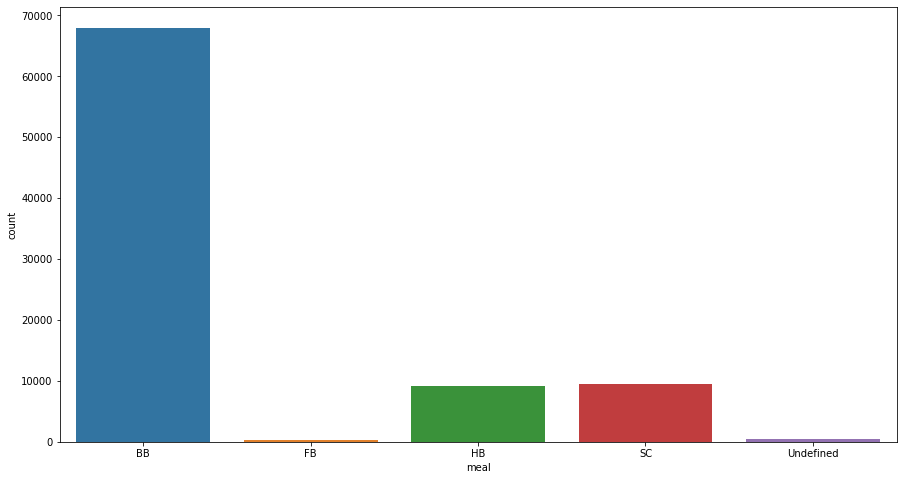

In [ ]:
#Here we will use countplot to plot the chart
plt.subplots( figsize=(15, 8))
sns.countplot(x = hotel_df['meal'])

Most preferred meal type is BB (Bed and breakfast).

## <b> (1) Hotel wise analysis </b>

Q1) What is percentage of bookings in each hotel?

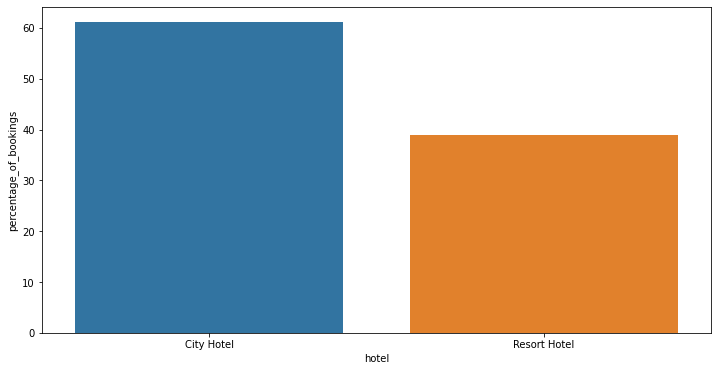

In [ ]:
group_by_hotel = hotel_df.groupby('hotel')
hotel_booking_df = group_by_hotel['hotel'].count().reset_index(name='bookings')
hotel_booking_df['percentage_of_bookings'] = (hotel_booking_df['bookings']/hotel_df.shape[0])*100
plt.subplots(figsize=(12,6))
sns.barplot(x='hotel',y='percentage_of_bookings',data=hotel_booking_df)
plt.show()

Around 60% bookings are done in 'City Hotel' nd 40 % bookings are done in 'Resort Hotel'.

Q2) which hotel seems to make more revenue?

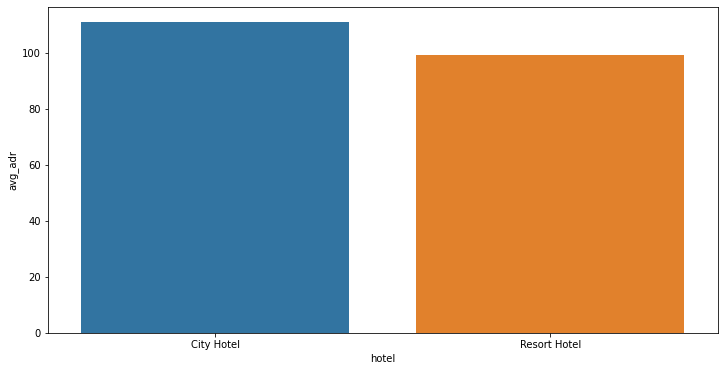

In [ ]:
hotel_revenue_df = group_by_hotel['adr'].mean().reset_index(name='avg_adr')
plt.subplots(figsize=(12,6))
sns.barplot(x='hotel',y='avg_adr',data=hotel_revenue_df)
plt.show()

'City Hotel' has more avg adr as compared to 'Resort Hotel', hence 'City Hotel' is having more revenue than 'Resort Hotel'.

 Q3)Which hotel has higher lead time?

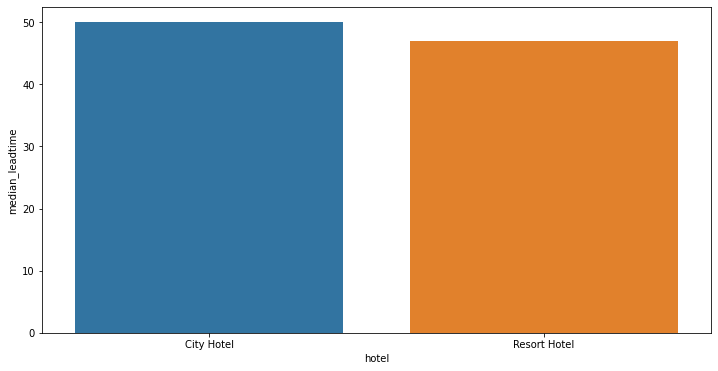

In [ ]:
hotel_leadtime_df = group_by_hotel['lead_time'].median().reset_index(name='median_leadtime')
plt.subplots(figsize=(12,6))
sns.barplot(x='hotel',y='median_leadtime',data=hotel_leadtime_df)
plt.show()

'City Hotel' has more lead time than 'Resort Hotel'. But both the hotels having good amount of lead time hence we cansya customer prefer to book the hotels well ahead of arrival.

Q4) What is preferred stay length in each hotel?

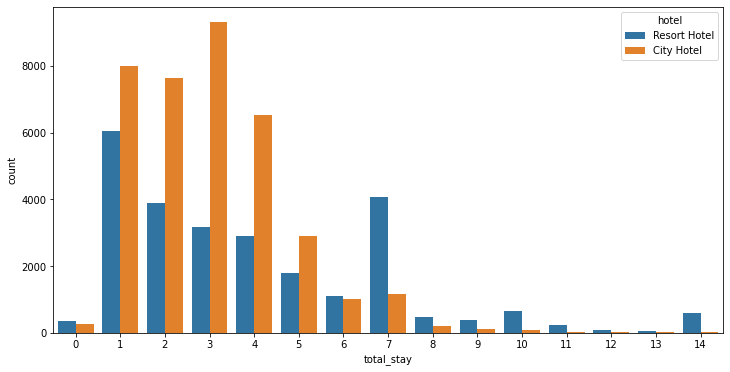

In [ ]:
stay_length_df = hotel_df[(hotel_df['is_canceled']==0) & (hotel_df['total_stay']<15)]
plt.subplots(figsize=(12,6))
sns.countplot(x='total_stay',data=stay_length_df,hue="hotel")
plt.show()

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

Q5) Which hotel has longer waiting time?

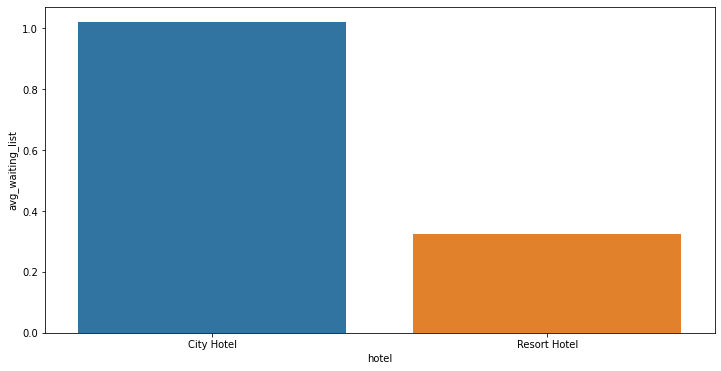

In [ ]:
longer_waiting_df = group_by_hotel['days_in_waiting_list'].mean().reset_index(name='avg_waiting_list')
plt.subplots(figsize=(12,6))
sns.barplot(x='hotel',y='avg_waiting_list',data=longer_waiting_df)
plt.show()

City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.

Q6) Which hotel has higher bookings cancellation rate.

In [ ]:
# Selecting and counting number of cancelled bookings for each hotel.
cancellation_df = pd.DataFrame(hotel_df[hotel_df['is_canceled']==1].groupby('hotel').size()).rename(columns = {0:'total_cancelled_bookings'})
# Counting total number of bookings for each type of hotel
bookin_df = pd.DataFrame(group_by_hotel.size()).rename(columns = {0: 'total_bookings'})
booking_cancellation_df = pd.concat([bookin_df,cancellation_df],axis=1)
# Calculating cancel percentage 
booking_cancellation_df['%cancellation'] = round((booking_cancellation_df['total_cancelled_bookings']/booking_cancellation_df['total_bookings'])*100,2)
booking_cancellation_df

,total_bookings,total_cancelled_bookings,%cancellation
hotel,,,
City Hotel,53427,16048,30.04
Resort Hotel,33968,7976,23.48


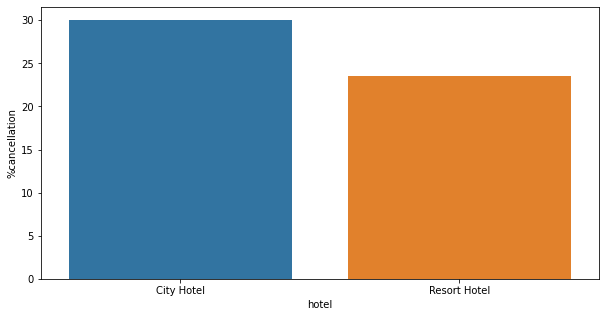

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = booking_cancellation_df.index, y = booking_cancellation_df['%cancellation'])
plt.show()

Almost 30 % of City Hotel bookings got canceled.

Q7) Which hotel has high chance that its customer will return for another stay?

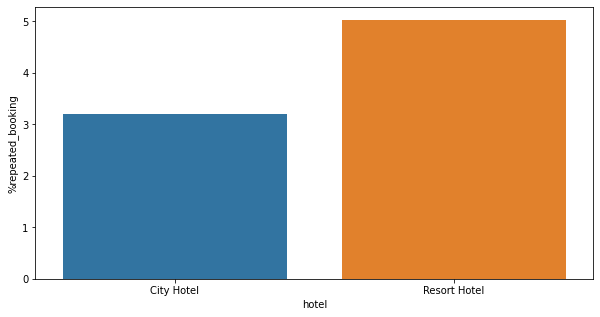

In [ ]:
hotel_df['is_repeated_guest'].unique()
# Selecting and counting repeated customers bookings
repeated_booking_df = pd.DataFrame(hotel_df[hotel_df['is_repeated_guest']==1].groupby('hotel').size()).rename(columns = {0:'total_repeated_bookings'})
repeat_booking_percentage_df = pd.concat([repeated_booking_df,bookin_df],axis=1)
# Calculating repeated booking percentage 
repeat_booking_percentage_df['%repeated_booking'] = round((repeat_booking_percentage_df['total_repeated_bookings']/repeat_booking_percentage_df['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = repeat_booking_percentage_df.index, y = repeat_booking_percentage_df['%repeated_booking'])
plt.show()


## <b> (2) Distribution Channel wise Analysis </b>

Both hotels have very small percentage that customer will repeat, but Resort hotel has slightly higher repeat % than City Hotel.

Q1) Which is the most common channel for booking hotels?

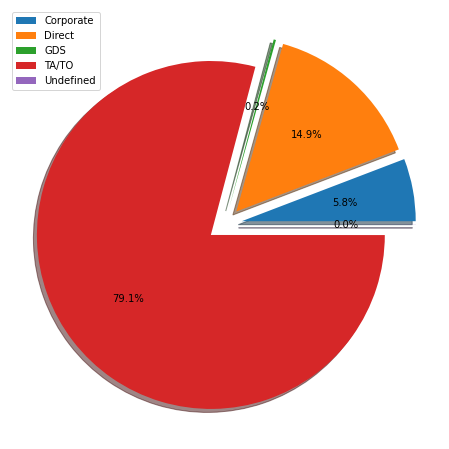

In [ ]:
group_by_dc = hotel_df.groupby('distribution_channel')
dischannel_df=pd.DataFrame(round((group_by_dc.size()/hotel_df.shape[0])*100,2)).reset_index().rename(columns={0:'%channel'})
plt.figure(figsize = (8,8))
plt.pie(x=dischannel_df['%channel'],autopct='%1.1f%%',shadow=True,explode=[0.1]*5)
plt.legend(dischannel_df['distribution_channel'])
plt.show()

Q2) Which channel is mostly used for early booking of hotels?

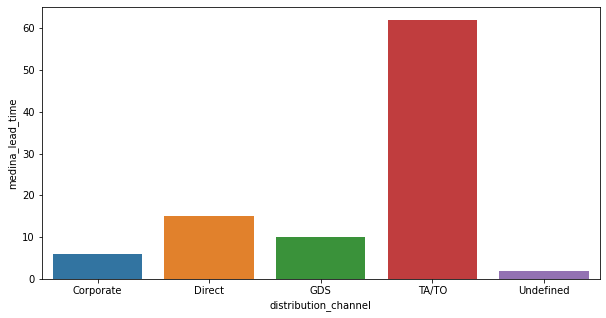

In [ ]:
channelwise_leadtime_df = group_by_dc['lead_time'].median().reset_index(name='medina_lead_time')
plt.subplots(figsize=(10,5))
sns.barplot(x='distribution_channel',y='medina_lead_time',data=channelwise_leadtime_df)
plt.show()

TA/TO is mostly used for planning Hotel visits ahead of time. But for sudden visits other mediums are most preferred.

Q3) Which channel has longer average waiting time?

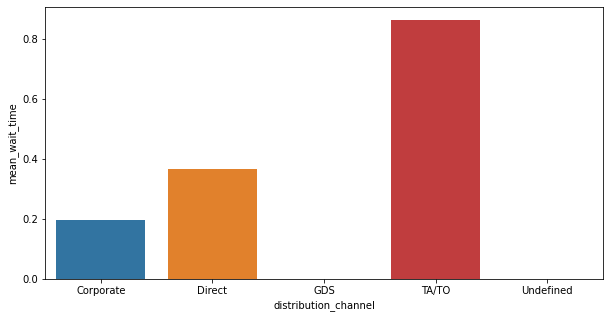

In [ ]:
channelwise_waittime_df = group_by_dc['days_in_waiting_list'].mean().reset_index(name='mean_wait_time')
plt.subplots(figsize=(10,5))
sns.barplot(x='distribution_channel',y='mean_wait_time',data=channelwise_waittime_df)
plt.show()

While booking via TA/TO one may have to wait a little longer to confirm booking of rooms.

Q4) Which distribution channel brings better revenue generating deals for hotels?

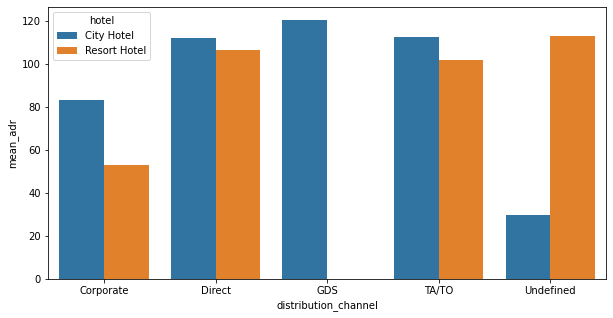

In [ ]:
group_by_dc_hotel = hotel_df.groupby(['distribution_channel','hotel'])
channel_revenue_df = group_by_dc_hotel['adr'].mean().reset_index(name='mean_adr')
plt.subplots(figsize=(10,5))
sns.barplot(x='distribution_channel',y='mean_adr',data=channel_revenue_df,hue='hotel')
plt.show()

GDS channel brings higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO. City Hotel can work to increase outreach on GDS channels to get more higher revenue generating deals.

Resort hotel has more revnue generating deals by direct and TA/TO channel. Resort Hotel need to increase outreach on GDS channel to increase revenue.

#From where the most guests are coming ?

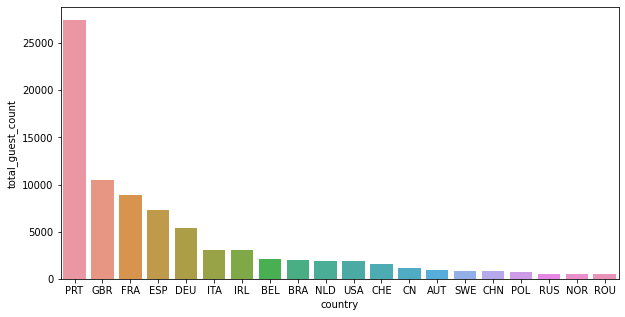

In [ ]:
group_by_country = hotel_df.groupby('country')
guest_country_df = group_by_country['total_people'].size().reset_index(name='total_guest_count').sort_values(ascending=False,by='total_guest_count')[:20]
plt.subplots(figsize=(10,5))
sns.barplot(x='country',y='total_guest_count',data=guest_country_df)
plt.show()

Most guest are from Portugal and other Europian contries.

# How long do people stay at the hotels?

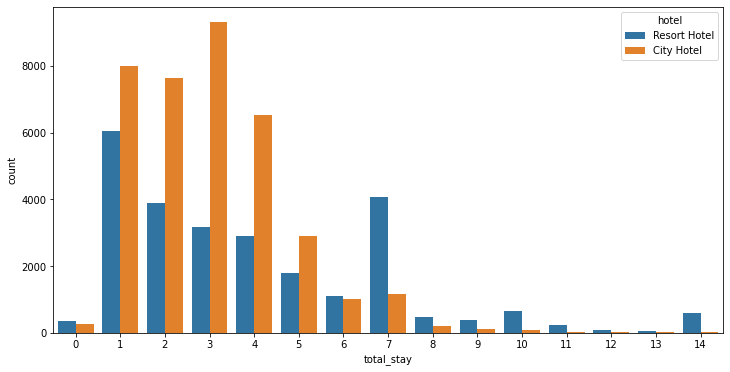

In [ ]:
stay_length_df = hotel_df[(hotel_df['is_canceled']==0) & (hotel_df['total_stay']<15)]
plt.subplots(figsize=(12,6))
sns.countplot(x='total_stay',data=stay_length_df,hue="hotel")
plt.show()

Most people prefer to stay at the hotels of <=5 days.